In [1]:
import os 
os.chdir('../')

In [2]:
import orca
from collections import OrderedDict

from urbansim_templates import modelmanager as mm
from urbansim_templates.models import LargeMultinomialLogitStep
from urbansim_templates.utils import get_data, get_df

from choicemodels.tools import MergedChoiceTable

from urbansim.models.util import columns_in_formula, apply_filter_query

In [3]:
region_code = '06197001'
orca.add_injectable('running_calibration_routine', False)
orca.add_injectable('local_simulation', True)
orca.add_injectable('initial_run', False)
orca.add_injectable('region_code', region_code)
orca.add_injectable('base_year', 2010)
orca.add_injectable('forecast_year', 2011)
orca.add_injectable('calibrated', True)
orca.add_injectable('calibrated_folder', 'custom')
orca.add_injectable('multi_level_lcms', True)
orca.add_injectable('segmented_lcms', True)
orca.add_injectable('capacity_boost', 1)
orca.add_injectable('all_local', True)
orca.add_injectable('skim_source', 'beam')

In [4]:
import datasources
import variables
import models

importing datasources
importing datasources for region 06197001
custom_mpo_06197001_model_data.h5
Checking if custom_settings.yaml file exists
Checking if custom output_parameters.yaml file exists


/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/datasources.py:357: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hct = hct.append(forecast_hct.reset_index())
/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/datasources.py:389: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ect = ect.append(forecast_ect.reset_index())


Output path exists!
importing variables for region 06197001
importing models for region 06197001
Checking if value configs exist
Checking if rent configs exist


In [5]:
configs_folder = 'configs/calibrated_configs/custom/06197001'
mm.initialize(configs_folder)
orca.run(orca.get_injectable('pre_processing_steps'))

Registering model step 'hlcm_county_own_1p_54less_pf'
Registering model step 'rdplcm_06081_blocks_pf'
Registering model step 'hlcm_06013_blocks_rent_1p_54less_pf'
Registering model step 'elcm_06097_blocks_1_pf'
Registering model step 'hlcm_06001_blocks_pf'
Registering model step 'mortality'
Registering model step 'hlcm_06075_blocks_own_2p_54less_pf'
Registering model step 'elcm_06001_blocks_2_pf'
Registering model step 'elcm_06041_blocks_3_pf'
Registering model step 'hlcm_06081_blocks_own_1p_54less_pf'
Registering model step 'elcm_06075_blocks_0_pf'
Registering model step 'hlcm_06013_blocks_pf'
Registering model step 'rdplcm_06013_blocks_sf_pf'
Registering model step 'hlcm_06055_blocks_own_1p_54less_pf'
Registering model step 'hlcm_06013_blocks_own_2p_54less_pf'
Registering model step 'hlcm_06085_blocks_own_2p_54less_pf'
Registering model step 'elcm_06013_blocks_4_pf'
Registering model step 'hlcm_06085_blocks_rent_2p_54less_pf'
Registering model step 'hlcm_06097_blocks_own_1p_55plus_pf

. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
Precomputing network for distance 1000.
Network precompute starting.
Network precompute done.
Time to execute step 'build_networks': 5.21 s
Running step 'generate_outputs'
Generating outputs for (year 2010, forecast year 2011)...
Time to execute step 'generate_outputs': 0.00 s
Total time to execute iteration 1 with iteration value None: 5.21 s


/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/variables.py:1303: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coords = blocks.local.groupby('block_group_id').mean().reset_index()
/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/01_projects/MLCM/02_github/DEMOS_URBANSIM/demos_urbansim/variables.py:1311: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coords = blocks.local.groupby('block_group_id').mean().reset_index()


In [6]:
travel_data = orca.get_table('travel_data')

In [7]:
t = travel_data.to_frame()

<Axes: ylabel='Frequency'>

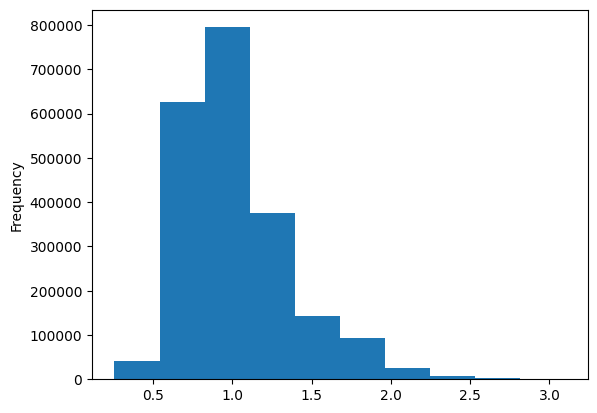

In [12]:
t.logsum.plot.hist()

In [ ]:
orca.get_table('counties').local

In [ ]:
orca.list_tables()

In [ ]:
import yaml

In [ ]:
def read_yaml_file(file_path):
    with open(file_path, 'r') as f:
        data = yaml.safe_load(f)
    return data

In [ ]:
@orca.injectable()
def mode_choice_template(region_code, calibrated_folder):
    # region_code = orca.get_injectable("region_code")
    # calibrated_folder = orca.get_injectable("calibrated_folder")

#     calibrated_path = os.path.join(
#         'configs',
#         'calibrated_configs/',
#         calibrated_folder,
#         region_code,
#         'mode_choice',
#         'mode_choice_logsum.yaml')
    
    calibrated_path = os.path.join(
        'configs',
        'calibrated_configs/',
        orca.get_injectable('calibrated_folder'),
        orca.get_injectable('region_code'),
        'mode_choice',
        'mode_choice_logsum.yaml')
    # output_file = f"configs/mode_choice/mode_choice_logsum.yaml"
    return read_yaml_file(calibrated_path)

In [ ]:
calibrated_path = os.path.join(
        'configs',
        'calibrated_configs/',
        orca.get_injectable('calibrated_folder'),
        orca.get_injectable('region_code'),
        'mode_choice',
        'mode_choice_logsum.yaml')

In [ ]:
calibrated_path

In [ ]:
orca.get_injectable('mode_choice_template')